# Intro to Inputting and Visualizing Data

In this section, we dicuss how to input and interpret basic ocean data.

As always, we first run `%pylab inline` to embed figures into the notebook. Additionally, we `import` the `scipy.io.netcdf` package to let us import data from another file.

In [10]:
%pylab inline
import scipy.io.netcdf

Populating the interactive namespace from numpy and matplotlib


## Inputting the Data

For detailed information on file/variable attributes, reference: https://github.com/M6ASP/getting-started/blob/master/Reading%20metadata%20with%20scipy.io.netcdf.ipynb

In [11]:
ncf = scipy.io.netcdf_file('example_data/WOA13_annual_SST_nc3_classic.nc')

In [12]:
ncf.variables

OrderedDict([('lat', <scipy.io.netcdf.netcdf_variable at 0x18124e5610>),
             ('lon', <scipy.io.netcdf.netcdf_variable at 0x18124e5650>),
             ('tos', <scipy.io.netcdf.netcdf_variable at 0x1812406190>)])

To keep things concise, we create local copies of the variables in `ncf`.

In [13]:
lat = ncf.variables['lat']
lon = ncf.variables['lon']
tos = ncf.variables['tos']

## Variable Metadata
The metadata is "data that provides other information about other data". In this case the metadata for each latitude, longitude, and sea surface temperature is listed under each of them below. We see that the metadata gives us specific attributes of these variables that we can then access. From the metadata, we are able to get more specific information about the variables. For example, we see that sea surface temperature has coordinates measured in time, latitude, longitude, and depth. 

### Latitude (lat)
- standard_name: latitude
- long_name: latitude
- units: degrees_north
- axis: Y
- bounds: lat_bnds

### Longitude (lon)
- standard_name: longitude
- long_name: longitude
- units: degrees_east
- axis: X
- bounds: lon_bnds

### Sea Surface Temperature (tos)
- standard_name: sea_surface_temperature
- long_name: Objectively analyzed mean fields for sea_surface_temperature at standard depth levels.
- coordinates: time lat lon depth
- cell_methods: 
  * area: mean depth
  * mean time: mean
- grid_mapping: crs
- units: degrees_celsius
- _fillValue: 9.96921e+36

We will include some examples of accessing various variable metadata below:

In [29]:
from __future__ import print_function
print('Sea Surface Temperature units: ', tos.units)
print('Sea Surface Temperature coordinates: ', tos.coordinates)
print('Latitude axis: ', lat.axis)
print('Longitude axis: ', lon.axis)

Sea Surface Temperature units:  degrees_celsius
Sea Surface Temperature coordinates:  time lat lon depth
Latitude axis:  Y
Longitude axis:  X


We can similarly access other metadata by calling any of the other attributes listed above for the appropriate variable. 

## Plotting Sea Surface Temperature

We see that our three variable represent latitude, longitude and sea surface temperature, respectively. We will soon plot sea surface temperature data, but first we should understand how to access this data.

Let us try to access the data at a specific point, say `(lat, lon) = (96, 25)`, by running the following command.

In [30]:
tos[96, 25]

27.82729

We find that at this point, our sea surface temperature is about 27.8 degrees Celsius. Additionally, we find the temperature at a few more points (and make the output cleaner by formatting the print statements).

In [31]:
print('Temp. at (90, 0):', tos[90, 0])
print('Temp. at (90, 100):', tos[90, 100])

Temp. at (90, 0): 28.432291
Temp. at (90, 100): 9.96921e+36


At the point (90, 0), we find the temperature to be about 28.4 degrees. However, at (90, 100), we find the temperature to be of an astronomical magnitude. To explain this, we must consider that some points may correspond to land and thus not have any data for sea surface height. For these missing values, netcdf will fill in the missing data with a certain value (usually called a fill value or missing value), which we can identify in the attributes of the tos variable.

In [17]:
tos._FillValue

9.96921e+36

We find that the value at `(lat, long) = (90, 100)` does in fact coincide with the fill value, meaning this point has no data for `tos`, and thus corresponds to land, rather than ocean.

If we plot sea surface temperature using this data and `plt.pcolormesh()`, we will find that our plot will be composed of binary colors due to this fill value.

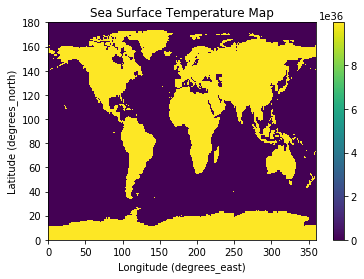

In [18]:
plt.pcolormesh( tos[:] );
plt.colorbar();
plt.title('Sea Surface Temperature Map');
plt.xlabel('Longitude (%s)' %lon.units);
plt.ylabel('Latitude (%s)' %lat.units);

In the plot above, we see that sea surface temperature for the land masses was colored yellow due to the fil value. Because sea surface temperature is irrelevant to our land masses, we will mask the hidden values and plot the map again so that the coloring excludes the continents.

In [19]:
# helper function for masking arrays with missing values
def maskArray(handle):
    return numpy.ma.array(handle[:], mask=(handle[:] == handle._FillValue))

In [20]:
masked = maskArray(tos)

In [21]:
print 'Temp. at (90, 0):', masked[90, 0]
print 'Temp. at (90, 100):', masked[90, 100]

Temp. at (90, 0): 28.432291
Temp. at (90, 100): --


We see that the surface temperature at `(90, 0)` is the same as before while at `(90, 100)` there is no data (as there shouldn't be). We can now accurately plot sea surface temperature

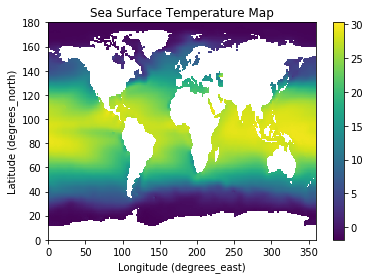

In [22]:
plt.pcolormesh( masked )
plt.colorbar();
plt.title('Sea Surface Temperature Map');
plt.xlabel('Longitude (%s)' %lon.units);
plt.ylabel('Latitude (%s)' %lat.units);

We can also change the color scheme.

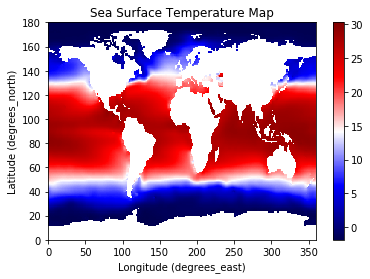

In [23]:
plt.pcolormesh( masked, cmap=cm.seismic ); 
plt.colorbar();
plt.title('Sea Surface Temperature Map');
plt.xlabel('Longitude (%s)' %lon.units);
plt.ylabel('Latitude (%s)' %lat.units);

In [26]:
# Not sure what this was supposed to do but geolon isn't a variable of ncf
# plt.pcolormesh( ncf.variables['geolon'])